<h3>Excercise 04: Building computer models with visual analytics</h3>

The goals of this exercise are use visualisations in creation, evaluation, and refinement of computer models. This is done by example of univariate regression models, which is a very simple model type. The focus of the exercise is not the modelling by itself but application of the principles of conscious model building, i.e., involvement of analytical reasoning throughout the process.:

For a more detailed description, refer to the exercise description document.

If mapping components are not installed on your computer, execute the following command

<pre> conda install -c conda-forge geopandas descartes mapclassify </pre>

<h4>Part I: Data loading, joining the population data with the geographic boundaries of the wards, removing wards with missing values, checking the link between the geographic data and the population attributes.</h4>

In [1]:
import geopandas as gp
import matplotlib.pyplot as plt
wards=gp.read_file('london_wards_2011_wgs84.shp')

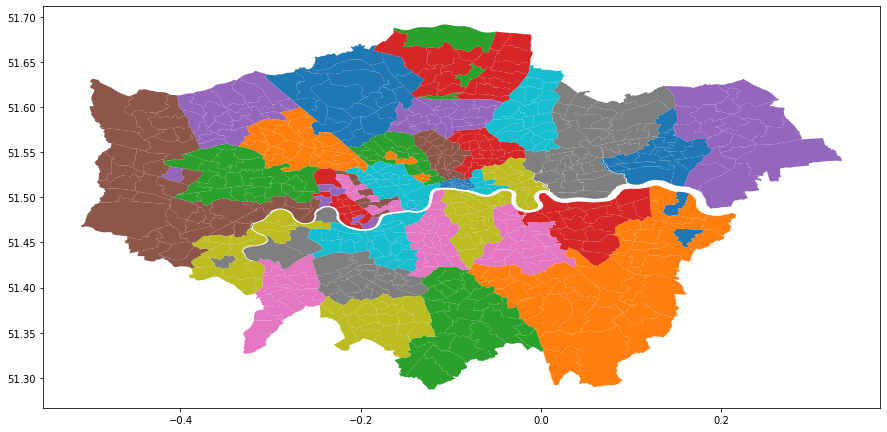

In [7]:
wards.plot(column='CODE', figsize=(15,10));
plt.show()

inspecting data content

In [26]:
import pandas as pd
df=pd.read_csv('population_perc.csv')

In [35]:
type(wards)

geopandas.geodataframe.GeoDataFrame

In [13]:
frames=[wards,df]

In [20]:
data=pd.concat(frames,axis=1)

In [36]:
data.head()

,CODE,OLDCODE,NAME,ALTNAME,geometry,id,Name,Borough,N of all usual residents,Area Hectares,...,distance to work=Less than 2km: Population % by distance travelled to work,distance to work=2km to less than 5km: Population % by distance travelled to work,distance to work=5km to less than 10km: Population % by distance travelled to work,distance to work=10km to less than 20km: Population % by distance travelled to work,distance to work=20km to less than 30km: Population % by distance travelled to work,distance to work=30km to less than 40km: Population % by distance travelled to work,distance to work=40km to less than 60km: Population % by distance travelled to work,distance to work=60km and over: Population % by distance travelled to work,distance to work=Work mainly at or from home: Population % by distance travelled to work,distance to work=Other: Population % by distance travelled to work
0,E05000001,00AAFA,Aldersgate,None,"POLYGON ((-0.09740 51.52159, -0.09730 51.52158...",E05000001,Aldersgate,NaN,1465.0,12.98,...,30.9,10.4,5.7,1.6,0.2,0.5,0.2,0.7,9.9,3.3
1,E05000002,00AAFB,Aldgate,None,"POLYGON ((-0.07786 51.51581, -0.07730 51.51545...",E05000002,Aldgate,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E05000003,00AAFC,Bassishaw,None,"POLYGON ((-0.09110 51.51804, -0.09002 51.51780...",E05000003,Bassishaw,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E05000004,00AAFD,Billingsgate,None,"POLYGON ((-0.08034 51.50801, -0.08052 51.50806...",E05000004,Billingsgate,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E05000005,00AAFE,Bishopsgate,None,"POLYGON ((-0.07847 51.52151, -0.07873 51.52104...",E05000005,Bishopsgate,NaN,222.0,81.53,...,36.5,8.6,5.9,2.3,0.5,0.0,0.0,0.5,21.6,4.1


Joining data table with geography and removing wards with missing values

In [32]:
frames=[wards,df]
data=pd.concat(frames,axis=1)
datann=data[data['Borough'].notnull()];
datann.describe()

,N of all usual residents,Area Hectares,Density (number of persons per hectare),Mean Age,Median Age,Average distance to work (km),age=0 to 4: Population % by age,age=5 to 7: Population % by age,age=8 to 9: Population % by age,age=10 to 14: Population % by age,...,distance to work=Less than 2km: Population % by distance travelled to work,distance to work=2km to less than 5km: Population % by distance travelled to work,distance to work=5km to less than 10km: Population % by distance travelled to work,distance to work=10km to less than 20km: Population % by distance travelled to work,distance to work=20km to less than 30km: Population % by distance travelled to work,distance to work=30km to less than 40km: Population % by distance travelled to work,distance to work=40km to less than 60km: Population % by distance travelled to work,distance to work=60km and over: Population % by distance travelled to work,distance to work=Work mainly at or from home: Population % by distance travelled to work,distance to work=Other: Population % by distance travelled to work
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,...,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,13087.445513,251.482853,81.072596,35.809455,34.257212,11.316987,7.155449,3.651282,2.207051,5.557853,...,5.833013,8.867949,11.232212,9.742628,1.951282,0.477244,0.348718,0.637019,4.770513,5.233494
std,2430.502303,255.672602,47.597964,3.086301,4.019309,2.104608,1.471681,0.770669,0.500191,1.319420,...,2.486367,4.007589,5.636473,5.110623,2.129627,0.222191,0.112029,0.130654,1.744939,1.130924
min,5110.000000,35.360000,1.800000,29.000000,26.000000,6.400000,2.700000,1.300000,0.700000,1.400000,...,2.300000,1.800000,3.600000,1.400000,0.200000,0.100000,0.100000,0.300000,1.700000,3.100000
25%,11200.000000,119.900000,45.300000,33.575000,31.000000,9.900000,6.100000,3.200000,1.900000,4.700000,...,4.400000,6.200000,7.400000,5.175000,0.800000,0.300000,0.300000,0.500000,3.500000,4.400000
50%,12989.500000,184.565000,69.050000,35.400000,33.000000,11.400000,7.100000,3.600000,2.200000,5.750000,...,5.200000,7.800000,9.200000,9.800000,1.200000,0.400000,0.300000,0.600000,4.500000,5.000000
75%,14864.750000,284.425000,109.550000,37.900000,37.000000,12.800000,8.000000,4.100000,2.500000,6.500000,...,6.500000,10.200000,13.300000,13.200000,2.000000,0.600000,0.400000,0.700000,5.600000,5.700000
max,23084.000000,2903.520000,264.700000,44.100000,46.000000,18.100000,13.200000,6.300000,4.100000,9.400000,...,20.100000,27.800000,36.600000,28.400000,13.900000,1.300000,1.000000,1.200000,12.800000,9.300000


Mapping selected attributes of interest as continuous and classified choropleth maps

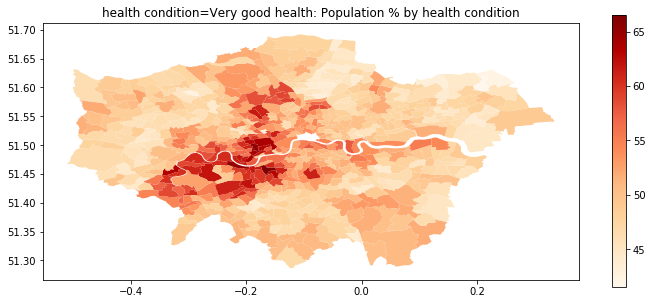

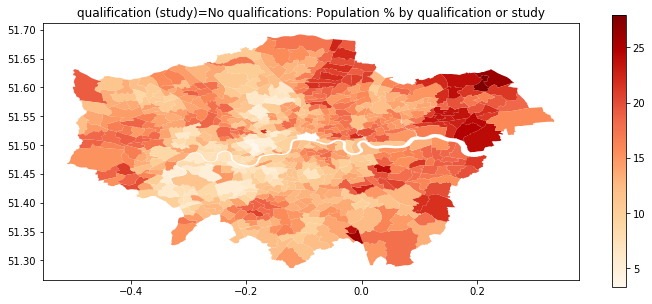

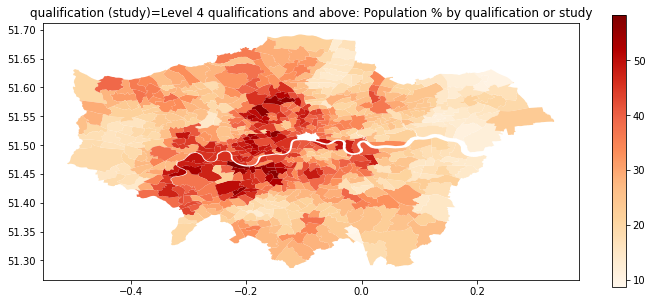

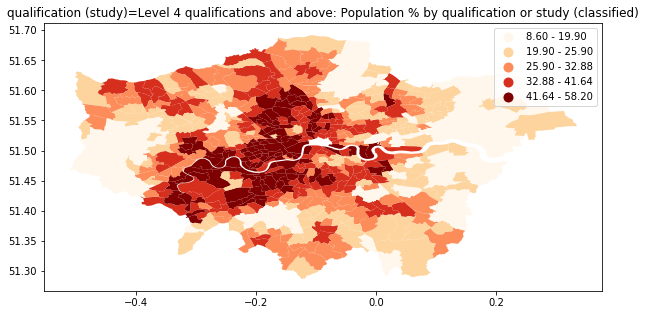

In [33]:
datann.crs = {'init' :'epsg:4326'}
#datann = datann.to_crs(epsg=3395) # comment this line if you get "no file found" error in pyproj
attr="health condition=Very good health: Population % by health condition";
ax=datann.plot(column=attr, cmap='OrRd', legend=True, figsize=(12,5));
ax.set_title(attr);
plt.show()
attr="qualification (study)=No qualifications: Population % by qualification or study";
ax=datann.plot(column=attr, cmap='OrRd', legend=True, figsize=(12,5));
ax.set_title(attr);
plt.show()
attr="qualification (study)=Level 4 qualifications and above: Population % by qualification or study";
ax=datann.plot(column=attr, cmap='OrRd', legend=True, figsize=(12,5));
ax.set_title(attr);
plt.show()
attr="qualification (study)=Level 4 qualifications and above: Population % by qualification or study";
ax=datann.plot(column=attr, cmap='OrRd', scheme='quantiles', legend=True,  figsize=(10,5));
ax.set_title(attr+' (classified)');
plt.show()